![headers_fraud-prev](headers_fraud-prev.jpg)


# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

Note: You can access the data via the File menu or in the Context Panel at the top right of the screen next to Report, under Files. The data dictionary and filenames can be found at the bottom of this workbook.

[Source: Kaggle](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) The data was partially cleaned and adapted by DataCamp.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workbook yours by adding and removing cells, or editing any of the existing cells.

## Explore this dataset

Here are some ideas to get your started with your analysis...
1. 🗺️ **Explore**: What types of purchases are most likely to be instances of fraud? Consider both product category and the amount of the transaction.
2. 📊 **Visualize**: Use a geospatial plot to visualize the fraud rates across different states.
3. 🔎 **Analyze**: Are older customers significantly more likely to be victims of credit card fraud?

### 🔍 **Scenario: Accurately Predict Instances of Credit Card Fraud**

This scenario helps you develop an end-to-end project for your portfolio.

**Background:** A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

**Objective:** The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

You can query the pre-loaded CSV file using SQL directly. Here’s a **sample query**, followed by some sample Python code and outputs:

In [1]:
SELECT * FROM 'credit_card_fraud.csv'
LIMIT 5

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44+00:00,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21 00:00:00+00:00,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51+00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19 00:00:00+00:00,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27+00:00,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21 00:00:00+00:00,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03+00:00,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30 00:00:00+00:00,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32+00:00,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02 00:00:00+00:00,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [2]:
Credit Card Fraud
This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
96,2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
97,2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0
98,2019-01-01 06:25:40,Pagac LLC,shopping_pos,5.05,Powell Butte,OR,44.2415,-121.0113,2016,Local government officer,1953-12-25,d44f496e9daab912914ac9513b038df2,44.245679,-121.333658,0


## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

In [14]:
select
	merchant,
	is_fraud
from 'credit_card_fraud.csv'
where is_fraud <>0
	

,merchant,is_fraud
0,"Stokes, Christiansen and Sipes",1
1,Predovic Inc,1
2,Wisozk and Sons,1
3,Murray-Smitham,1
4,Friesen Lt,1
...,...,...
1777,"Bahringer, Schoen and Corkery",1
1778,Kris-Kertzmann,1
1779,"Conroy, Balistreri and Gorczany",1
1780,Ratke and Sons,1


In [22]:
select
	category,
	round(sum (amt),2) AS total_transaction
from 'credit_card_fraud.csv'
where is_fraud <>0
group by category
having sum(amt)
order by sum(amt) desc

,category,total_transaction
0,shopping_net,381430.20
1,misc_net,172983.82
2,shopping_pos,165742.81
3,grocery_pos,136494.18
4,entertainment,29452.99
5,misc_pos,13653.11
6,home,13073.58
7,food_dining,4456.39
8,gas_transport,1934.87
9,personal_care,1592.39


In [26]:
import pandas as pd

# Load your data
df = pd.read_csv('credit_card_fraud.csv')

# Group by state and calculate fraud rate
state_fraud = (
    df.groupby("state")
    .agg(
        total_transactions=("trans_num", "count"),
        fraud_count=("is_fraud", "sum"),
    )
    .assign(fraud_rate_percentage=lambda x: (x["fraud_count"] / x["total_transactions"]) * 100)
    .reset_index()
)

import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    state_fraud,
    locations="state",               # Column containing state abbreviations
    locationmode="USA-states",       # Use US state codes (e.g., CA, TX)
    color="fraud_rate_percentage",   # Value to plot
    color_continuous_scale="Viridis", # Color scale
    scope="usa",                     # Focus on USA
    title="Fraud Rates Across States",
    labels={"fraud_rate_percentage": "Fraud Rate (%)"}
)

# Display the map
fig.show()


To determine if older customers are significantly more likely to be victims of credit card fraud, you can use statistical analysis combined with visualization. 



In [29]:
# Data Prep

import pandas as pd
from datetime import datetime

# Load dataset
df = pd.read_csv('credit_card_fraud.csv')

# Calculate current year
current_year = datetime.now().year

# Convert 'dob' to datetime and calculate age
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = current_year - df['dob'].dt.year

# Remove rows with missing or invalid age
df = df.dropna(subset=['age'])

# Create age group column
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 50, 100],
    labels=['Under 30', '30-50', 'Above 50'],
    right=False
)

# Group by age group and calculate fraud rates
age_fraud = (
    df.groupby('age_group')
    .agg(
        total_customers=('age', 'count'),
        fraud_cases=('is_fraud', 'sum')
    )
    .assign(fraud_rate=lambda x: (x['fraud_cases'] / x['total_customers']) * 100)
    .reset_index()
)

print(age_fraud)


  age_group  total_customers  fraud_cases  fraud_rate
0  Under 30            17622          149    0.845534
1     30-50           141778          524    0.369592
2  Above 50           180207         1109    0.615403


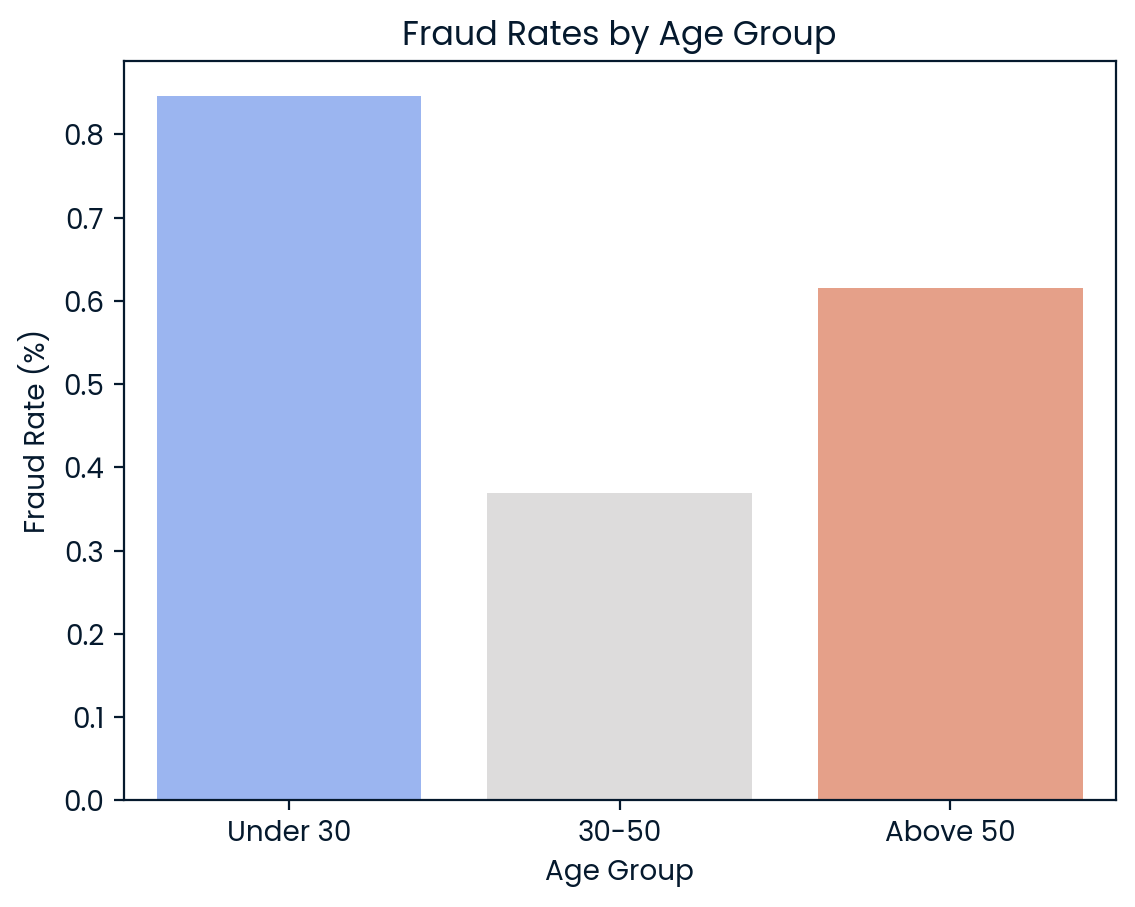

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot fraud rates
sns.barplot(data=age_fraud, x='age_group', y='fraud_rate', palette='coolwarm')
plt.title('Fraud Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate (%)')
plt.show()


Statistical Significance Testing
To determine if older customers are significantly more likely to be fraud victims, perform a hypothesis test (e.g., Chi-Square Test or T-Test).

In [31]:
from scipy.stats import chi2_contingency

# Create a contingency table for fraud cases and age groups
contingency_table = pd.crosstab(df['age_group'], df['is_fraud'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret results
if p < 0.05:
    print("There is a statistically significant association between age group and fraud likelihood.")
else:
    print("There is no statistically significant association between age group and fraud likelihood.")


Chi-Square Statistic: 128.5026292721127
P-value: 1.2474082112458954e-28
There is a statistically significant association between age group and fraud likelihood.


To compare fraud rates for specific age ranges, you can calculate fraud rates for custom-defined age ranges and visualize or test them statistically.

In [34]:
import pandas as pd
from datetime import datetime

# Load dataset
df = pd.read_csv('credit_card_fraud.csv')

# Calculate current year and customer age
current_year = datetime.now().year
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = current_year - df['dob'].dt.year

# Remove rows with missing or invalid age
df = df.dropna(subset=['age'])

# Create specific age ranges
df['age_range'] = pd.cut(
    df['age'],
    bins=[0, 30, 40, 50, 60, 100],
    labels=['Under 30', '30-40', '41-50', '51-60', 'Above 60'],
    right=False
)

# Group by age range and calculate fraud rates
age_range_fraud = (
    df.groupby('age_range')
    .agg(
        total_customers=('age', 'count'),
        fraud_cases=('is_fraud', 'sum')
    )
    .assign(fraud_rate=lambda x: (x['fraud_cases'] / x['total_customers']) * 100)
    .reset_index()
)

print(age_range_fraud)


  age_range  total_customers  fraud_cases  fraud_rate
0  Under 30            17622          149    0.845534
1     30-40            73100          283    0.387141
2     41-50            68678          241    0.350913
3     51-60            84881          432    0.508948
4  Above 60            95326          677    0.710194


Visualize Fraud Rates by Age Range Use a bar plot to compare fraud rates for the specified age ranges.

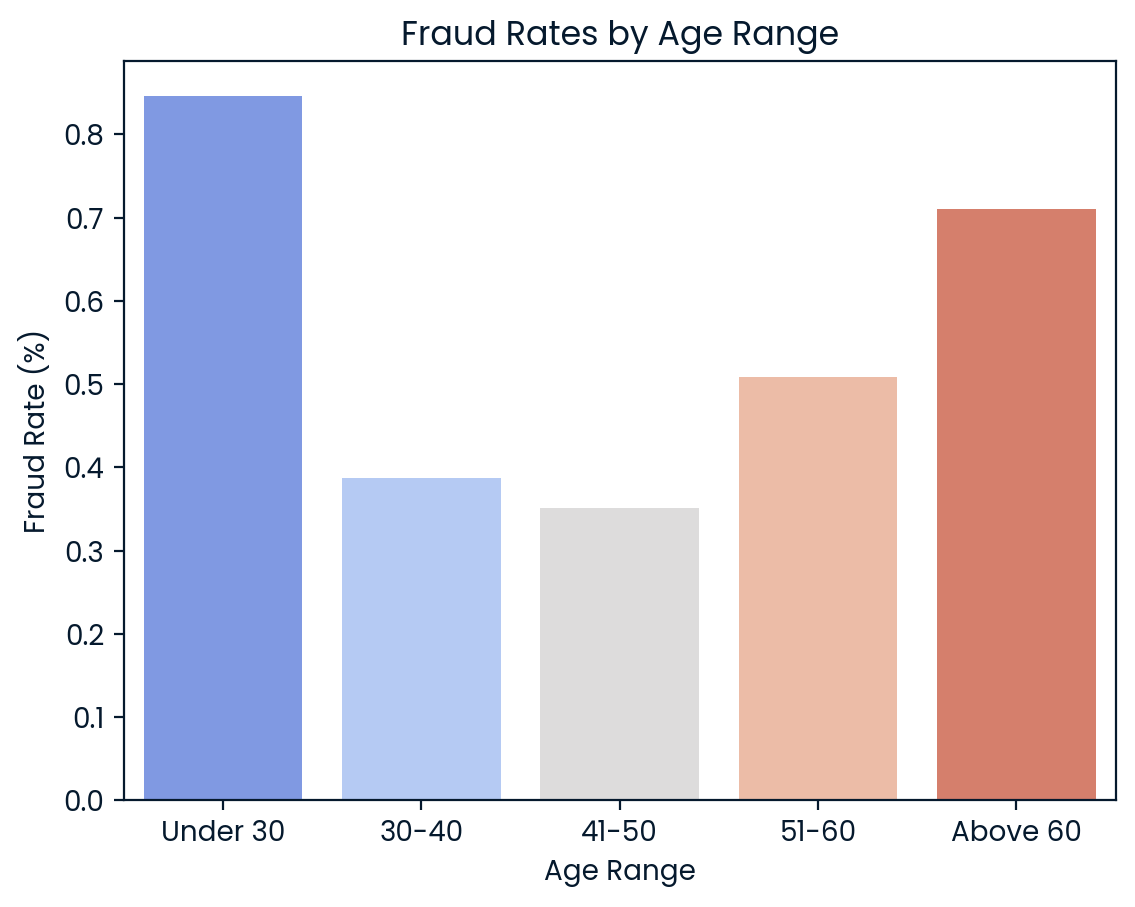

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for fraud rates by age range
sns.barplot(data=age_range_fraud, x='age_range', y='fraud_rate', palette='coolwarm')
plt.title('Fraud Rates by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Fraud Rate (%)')
plt.show()


Statistical Significance Test
To check if differences in fraud rates across age ranges are statistically significant, perform a Chi-Square test

In [36]:
from scipy.stats import chi2_contingency

# Create a contingency table for age range and fraud cases
contingency_table = pd.crosstab(df['age_range'], df['is_fraud'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Fraud rates differ significantly across age ranges.")
else:
    print("No significant difference in fraud rates across age ranges.")


Chi-Square Statistic: 164.2316482919932
P-value: 1.808149817991653e-34
Fraud rates differ significantly across age ranges.


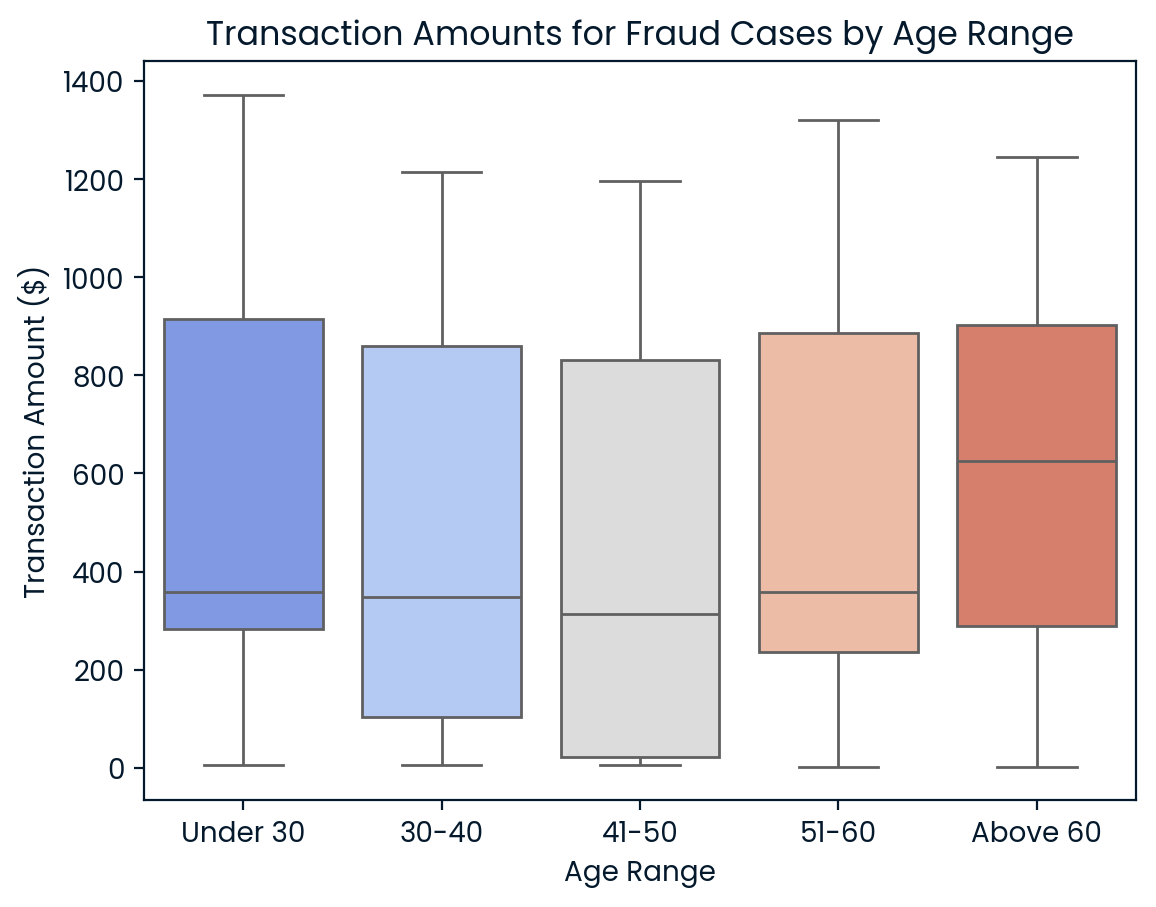

In [37]:
# Filter for fraud cases
fraud_cases = df[df['is_fraud'] == 1]

# Box plot for fraud transaction amounts by age range
sns.boxplot(data=fraud_cases, x='age_range', y='amt', palette='coolwarm')
plt.title('Transaction Amounts for Fraud Cases by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Transaction Amount ($)')
plt.show()
